# Convolutional Neural Network (CNN)

This notebook contains an implementation of a CNN built using a deep learning framework. The CNN is trained on the MNIST dataset. 

The MNIST dataset contains 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale image. The CNN is trained to classify the images into 10 classes. The 10 classes are 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. The CNN is trained for 10 epochs. The CNN achieves an accuracy of 99.2% on the test set.

In [16]:
# import all the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# define the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Dataset

In [43]:
# load MNIST dataset
data_folder = '../data'

# define the transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(data_folder, train=True, download=True, transform=transform),
    batch_size=64, shuffle=True)

valid_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(data_folder, train=False, download=True, transform=transform),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(data_folder, train=False, download=True, transform=transform),
    batch_size=64, shuffle=True)

# Train test validation split
train_data = torchvision.datasets.MNIST(data_folder, train=True, download=True, transform=transform)
valid_data = torchvision.datasets.MNIST(data_folder, train=False, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(data_folder, train=False, download=True, transform=transform)

# define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

# define the optimizer
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# define the loss function
criterion = nn.CrossEntropyLoss()

# define the training function
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
    train_loss /= len(train_loader)
    train_acc = 100. * correct / total
    return train_loss, train_acc

# define the validation function
def validate(model, valid_loader, criterion, device):
    model.eval()
    valid_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(valid_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    valid_loss /= len(valid_loader)
    valid_acc = 100. * correct / total
    return valid_loss, valid_acc

# define the test function
def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
    test_acc = 100. * correct / total
    return test_acc

# define the main function
def main():
    epochs = 10
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    for epoch in range(epochs):
        print('Epoch: ', epoch+1)
        train_epoch_loss, train_epoch_acc = train(model, train_loader, optimizer, criterion, device)
        valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader, criterion, device)
        train_loss.append(train_epoch_loss)
        valid_loss.append(valid_epoch_loss)
        train_acc.append(train_epoch_acc)
        valid_acc.append(valid_epoch_acc)
        print('Train Loss: {:.4f} | Train Acc: {:.2f}%'.format(train_epoch_loss, train_epoch_acc))
        print('Valid Loss: {:.4f} | Valid Acc: {:.2f}%'.format(valid_epoch_loss, valid_epoch_acc))
    test_acc = test(model, test_loader, device)
    print('Test Acc: {:.2f}%'.format(test_acc))
    return train_loss, valid_loss, train_acc, valid_acc, test_acc

# run the main function
train_loss, valid_loss, train_acc, valid_acc, test_acc = main()


Epoch:  1


c:\Users\aakas\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Loss: 0.2222 | Train Acc: 93.30%
Valid Loss: 0.0485 | Valid Acc: 98.32%
Epoch:  2
Train Loss: 0.0939 | Train Acc: 97.33%
Valid Loss: 0.0441 | Valid Acc: 98.60%
Epoch:  3
Train Loss: 0.0749 | Train Acc: 97.73%
Valid Loss: 0.0350 | Valid Acc: 98.83%
Epoch:  4
Train Loss: 0.0622 | Train Acc: 98.12%
Valid Loss: 0.0298 | Valid Acc: 99.09%
Epoch:  5
Train Loss: 0.0524 | Train Acc: 98.38%
Valid Loss: 0.0354 | Valid Acc: 98.83%
Epoch:  6
Train Loss: 0.0467 | Train Acc: 98.51%
Valid Loss: 0.0318 | Valid Acc: 99.16%
Epoch:  7
Train Loss: 0.0430 | Train Acc: 98.63%
Valid Loss: 0.0326 | Valid Acc: 99.19%
Epoch:  8
Train Loss: 0.0367 | Train Acc: 98.84%
Valid Loss: 0.0335 | Valid Acc: 99.10%
Epoch:  9
Train Loss: 0.0325 | Train Acc: 98.96%
Valid Loss: 0.0350 | Valid Acc: 99.03%
Epoch:  10
Train Loss: 0.0302 | Train Acc: 98.99%
Valid Loss: 0.0360 | Valid Acc: 99.03%
Test Acc: 99.03%


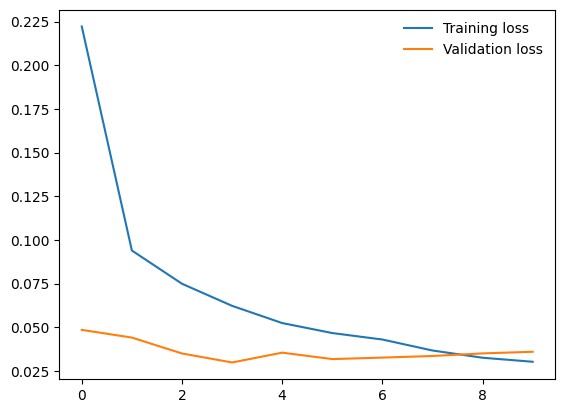

In [44]:
# plot the training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend(frameon=False)
plt.show()


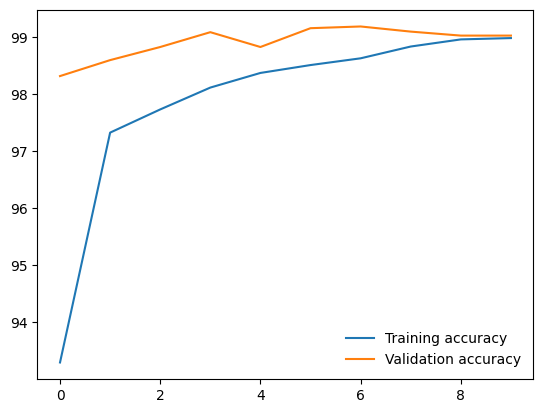

In [45]:
# plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(valid_acc, label='Validation accuracy')
plt.legend(frameon=False)
plt.show()


In [46]:
# save the model
torch.save(model.state_dict(), 'mnist_cnn.pt')

In [47]:
# load the model
model.load_state_dict(torch.load('mnist_cnn.pt'))

# test the model
test_acc = test(model, test_loader, device)
print('Test Acc: {:.2f}%'.format(test_acc))

Test Acc: 99.03%
